In [1]:
import pandas as pd
import numpy as np

# Старые данные

In [2]:
data_1 = pd.read_excel("d1.xlsx")
data_2 = pd.read_excel("d2.xlsx")

In [3]:
data = pd.concat([data_1, data_2])

In [4]:
data = data.sort_values(by='Дата')
country = data['Страна'].unique()

In [24]:
from mylib.train import Trainer

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
clf = Trainer(AgglomerativeClustering(n_clusters=None, metric='precomputed',
                                linkage='average', distance_threshold=0.5), data)
clasters = clf.fit_predict()

In [10]:
clasters[:4]

[array(['Финляндия', 'Мальта', 'Дания', 'Бельгия', 'Молдавия', 'Сербия',
        'Венгрия', 'Латвия', 'Азербайджан', 'Литва', 'Швеция',
        'Люксембург', 'Грузия', 'Сан-Марино', 'Германия', 'Швейцария',
        'США', 'Словакия', 'Иордания', 'Черногория', 'Сирия', 'Кения',
        'Лихтенштейн', 'Италия', 'Западный берег реки Иордан', 'Эстония',
        'Словения', 'Босния и Герцеговина', 'Армения', 'Норвегия',
        'Нидерланды', 'Чехия', 'Болгария', 'Канада', 'Марокко', 'Албания',
        'Украина', 'Польша', 'Северная Македония', 'Румыния', 'Ливан',
        'Австрия', 'Хорватия'], dtype=object),
 array(['Фиджи', 'Уганда', 'Кипр', 'Малайзия', 'Малави', 'Куба', 'Сенегал',
        'Япония', 'Таиланд', 'Лаос', 'Тунис', 'Индонезия', 'Ливия', 'ЮАР',
        'Руанда', 'Алжир', 'Эсватини', 'Вьетнам', 'Южная Корея',
        'Колумбия', 'Суринам', 'Намибия', 'Мьянма', 'Зимбабве',
        'Афганистан', 'Мавритания', 'ДР Конго', 'Иран', 'Мозамбик',
        'Греция', 'Бангладеш', 'Замбия']

In [40]:

corr = clf.corr

In [ ]:
import itertools

my_list = [1, 2, 3]
permutations = list(itertools.permutations(my_list))

for p in permutations:
    print(p)


In [11]:
import matplotlib.pyplot as plt

In [14]:
# fig = plt.figure(figsize=(8, 8))
# plt.title('Сглаженные эпидемические кривые для стран из кластера Россия \n \
# на интервале от 01.02.2020 до 04.08.2021', va='bottom', fontsize=15)
# #plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.95)
# for i in range(len(rus_claster)-1):
#   y = data[data['Страна'] == rus_claster[i]]['Заражений за день']
#   y = y.rolling(window=30).mean().iloc[29:].values
#   plt.plot(np.arange(len(y))+1, y / max(y), label=rus_claster[i])
# plt.xlabel('Дата')
# plt.ylabel('Процентное число заражений')
# l = list(data[data['Страна'] == rus_claster[i]]['Дата'].dt.date)
# plt.xticks(np.arange(0, len(l), 100), l[::100], rotation=20)
# plt.grid(True)
# plt.legend()
# plt.savefig('11.jpg')

In [15]:
# fig = plt.figure(figsize=(13, 15))
# plt.suptitle('Сглаженная эпидемическая кривая для стран из кластера Россия \
# на интервале от 01.02.2020 до 04.08.2021', va='bottom', fontsize=15)
# plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.95)
# for i in range(len(rus_claster)):
#   y = data[data['Страна'] == rus_claster[i]]['Заражений за день']
#   y = y.rolling(window=5).mean().iloc[4:].values
#   plt.subplot(4, 3, i+1)
#   plt.plot(np.arange(len(y))+1, y)
#   plt.title(rus_claster[i])
#   plt.xlabel('Дата')
#   plt.ylabel('Количество заражений')
#   l = list(data[data['Страна'] == rus_claster[i]]['Дата'].dt.date)
#   plt.xticks(np.arange(0, len(l), 100), l[::100], rotation=20)
#   plt.grid(True)
# plt.savefig('1.jpg')

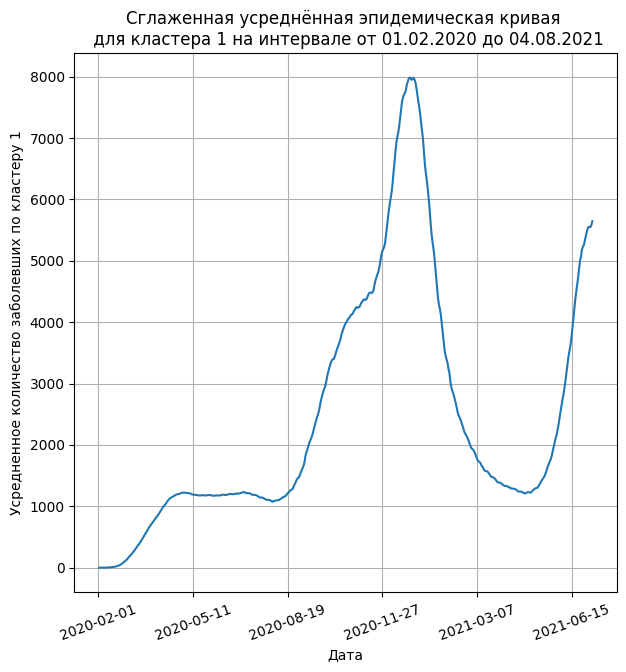

In [18]:
plt.figure(figsize=(7, 7))
total_y = np.array(data[data['Страна'] == clasters[3][0]]['Заражений за день'])
for i in range(1, len(clasters[3])):
  total_y += np.array(data[data['Страна'] == clasters[3][i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(clasters[3])

plt.plot(np.arange(len(total_y))+1, total_y)
plt.title('Сглаженная усреднённая эпидемическая кривая \n для кластера 1 на интервале от 01.02.2020 до 04.08.2021')
plt.xlabel('Дата')
plt.ylabel('Усредненное количество заболевших по кластеру 1')
l = list(data[data['Страна'] == clasters[3][0]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 100), l[::100], rotation=20)
plt.grid(True)
plt.savefig('clasters1.jpg')
plt.show()

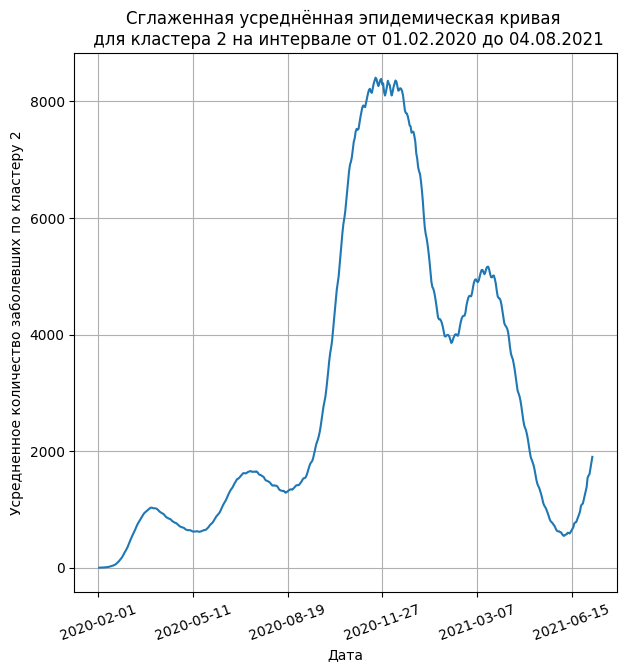

In [17]:
plt.figure(figsize=(7, 7))
total_y = np.array(data[data['Страна'] == clasters[0][0]]['Заражений за день'])
for i in range(1, len(clasters[0])):
  total_y += np.array(data[data['Страна'] == clasters[0][i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(clasters[0])

plt.plot(np.arange(len(total_y))+1, total_y)
plt.title('Сглаженная усреднённая эпидемическая кривая \n для кластера 2 на интервале от 01.02.2020 до 04.08.2021')
plt.xlabel('Дата')
plt.ylabel('Усредненное количество заболевших по кластеру 2')
l = list(data[data['Страна'] == clasters[0][0]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 100), l[::100], rotation=20)
plt.grid(True)
plt.savefig('clasters2.jpg')
plt.show()

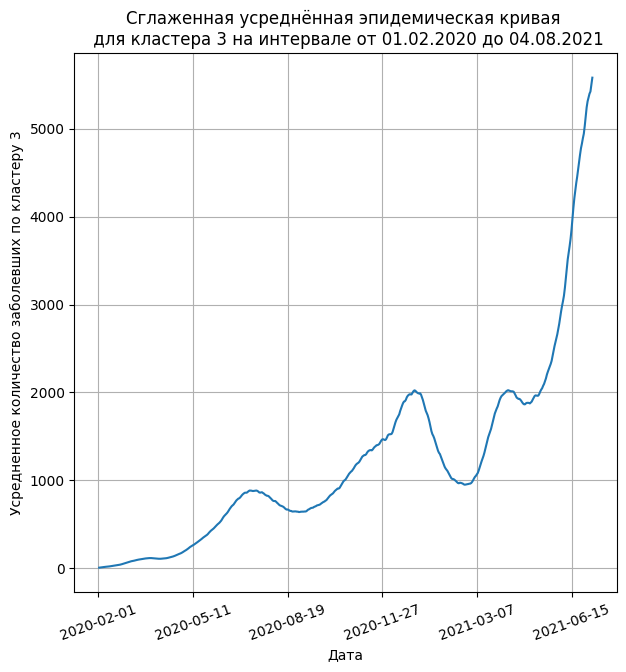

In [21]:
plt.figure(figsize=(7, 7))
total_y = np.array(data[data['Страна'] == clasters[1][0]]['Заражений за день'])
for i in range(1, len(clasters[1])):
  total_y += np.array(data[data['Страна'] == clasters[1][i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(clasters[1])

plt.plot(np.arange(len(total_y))+1, total_y)
plt.title('Сглаженная усреднённая эпидемическая кривая \n для кластера 3 на интервале от 01.02.2020 до 04.08.2021')
plt.xlabel('Дата')
plt.ylabel('Усредненное количество заболевших по кластеру 3')
l = list(data[data['Страна'] == clasters[1][0]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 100), l[::100], rotation=20)
plt.grid(True)
plt.savefig('clasters3.jpg')
plt.show()

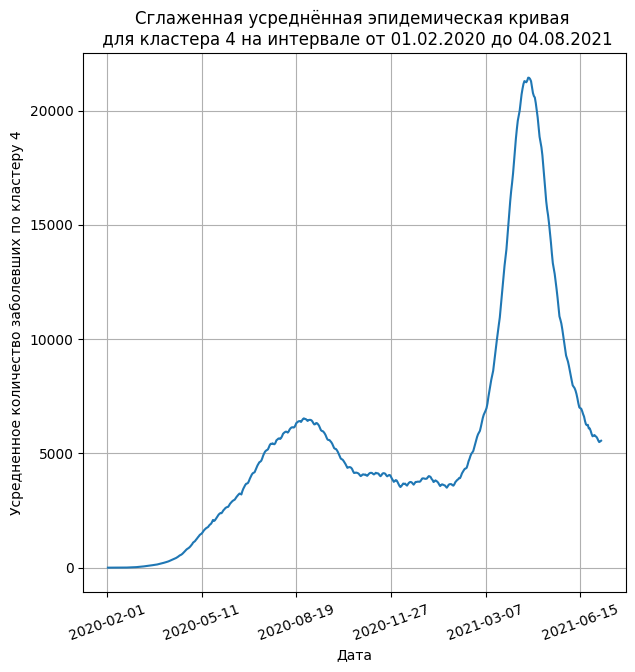

In [20]:
plt.figure(figsize=(7, 7))
total_y = np.array(data[data['Страна'] == clasters[2][0]]['Заражений за день'])
for i in range(1, len(clasters[2])):
  total_y += np.array(data[data['Страна'] == clasters[2][i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(clasters[2])

plt.plot(np.arange(len(total_y))+1, total_y)
plt.title('Сглаженная усреднённая эпидемическая кривая \n для кластера 4 на интервале от 01.02.2020 до 04.08.2021')
plt.xlabel('Дата')
plt.ylabel('Усредненное количество заболевших по кластеру 4')
l = list(data[data['Страна'] == clasters[2][0]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 100), l[::100], rotation=20)
plt.grid(True)
plt.savefig('clasters4.jpg')
plt.show()

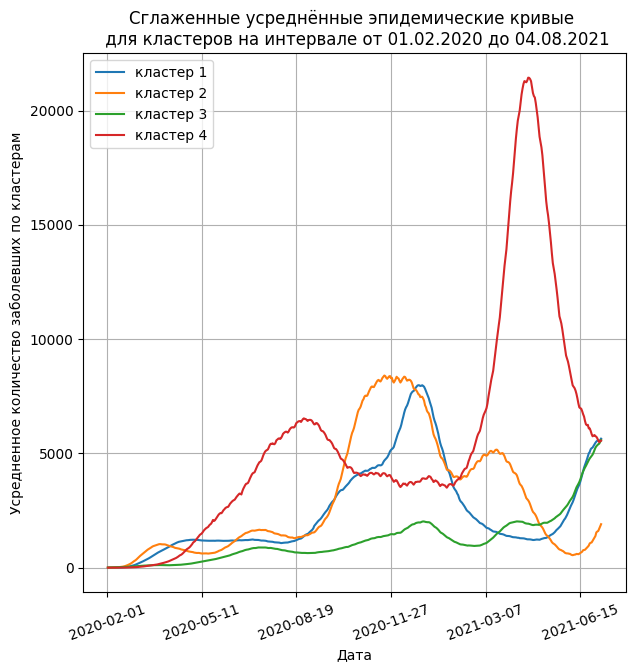

In [23]:
plt.figure(figsize=(7, 7))
total_y = np.array(data[data['Страна'] == clasters[3][0]]['Заражений за день'])
for i in range(1, len(clasters[3])):
  total_y += np.array(data[data['Страна'] == clasters[3][i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(clasters[3])
plt.plot(np.arange(len(total_y))+1, total_y, label='кластер 1')

total_y = np.array(data[data['Страна'] == clasters[0][0]]['Заражений за день'])
for i in range(1, len(clasters[0])):
  total_y += np.array(data[data['Страна'] == clasters[0][i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(clasters[0])
plt.plot(np.arange(len(total_y))+1, total_y, label='кластер 2')

total_y = np.array(data[data['Страна'] == clasters[1][0]]['Заражений за день'])
for i in range(1, len(clasters[1])):
  total_y += np.array(data[data['Страна'] == clasters[1][i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(clasters[1])
plt.plot(np.arange(len(total_y))+1, total_y, label='кластер 3')

total_y = np.array(data[data['Страна'] == clasters[2][0]]['Заражений за день'])
for i in range(1, len(clasters[2])):
  total_y += np.array(data[data['Страна'] == clasters[2][i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(clasters[2])
plt.plot(np.arange(len(total_y))+1, total_y, label='кластер 4')

plt.title('Сглаженные усреднённые эпидемические кривые \n для кластеров на интервале от 01.02.2020 до 04.08.2021')
plt.xlabel('Дата')
plt.ylabel('Усредненное количество заболевших по кластерам')
l = list(data[data['Страна'] == clasters[1][0]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 100), l[::100], rotation=20)
plt.grid(True)
plt.legend()
plt.savefig('clasters_all.jpg')
plt.show()

# Новые данные

In [ ]:
data_new = pd.read_excel("data_2023.xlsx")

In [ ]:
country_new = data_new['Страна'].unique()
len(country_new)

200

In [ ]:
data_new = data_new.sort_values(by='Дата')

In [ ]:
data_new[data_new['Страна'] == 'Россия']

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день
28884,Россия,2022-04-01 03:00:00,17601907,NaN,361679,18796,NaN,331
43281,Россия,2022-04-02 03:00:00,17619521,NaN,362008,17614,NaN,329
47218,Россия,2022-04-03 03:00:00,17636019,NaN,362304,16498,NaN,296
56396,Россия,2022-04-04 03:00:00,17651048,NaN,362581,15029,NaN,277
52011,Россия,2022-04-05 03:00:00,17664790,NaN,362890,13742,NaN,309
...,...,...,...,...,...,...,...,...
46410,Россия,2023-01-08 03:00:00,21518745,NaN,386150,3090,NaN,45
51604,Россия,2023-01-09 03:00:00,21521470,NaN,386191,2725,NaN,41
55064,Россия,2023-01-10 03:00:00,21524480,NaN,386237,3010,NaN,46
26932,Россия,2023-01-11 03:00:00,21528662,NaN,386283,4182,NaN,46


In [ ]:
n = len(data_new[data_new['Страна'] == country_stat[0]]['Заражений за день'])
corr_new = np.eye(len(country_stat))
for i in range(len(country_stat)):
  for j in range(i+1, len(country_stat)):
    si = data_new[data_new['Страна'] == country_stat[i]]['Заражений за день']
    sj = data_new[data_new['Страна'] == country_stat[j]]['Заражений за день']
    p = []
    for l in range(21):
        if np.std(si[:n-l]) != 0 and np.std(sj[l:]) != 0:
          p.append(np.abs(np.corrcoef(si[:n-l], sj[l:])[0,1]))
        if np.std(sj[:n-l]) != 0 and np.std(si[l:]) != 0:
          p.append(np.abs(np.corrcoef(si[l:], sj[:n-l])[0,1]))
    if p == []:
      corr_new[i, j] = 0
      corr_new[j, i] = 0
    else:
      corr_new[i, j] = np.max(p)
      corr_new[j, i] = np.max(p)

In [ ]:
corr_new

array([[1.        , 0.1186869 , 0.34792444, ..., 0.15730732, 0.4723759 ,
        0.27136418],
       [0.1186869 , 1.        , 0.2906955 , ..., 0.29229213, 0.24749199,
        0.15792381],
       [0.34792444, 0.2906955 , 1.        , ..., 0.24240844, 0.35111161,
        0.36297285],
       ...,
       [0.15730732, 0.29229213, 0.24240844, ..., 1.        , 0.33116821,
        0.22533899],
       [0.4723759 , 0.24749199, 0.35111161, ..., 0.33116821, 1.        ,
        0.26978253],
       [0.27136418, 0.15792381, 0.36297285, ..., 0.22533899, 0.26978253,
        1.        ]])

In [ ]:
agg = AgglomerativeClustering(n_clusters=None, metric='precomputed', linkage='average', distance_threshold=0.5)
labels_new = agg.fit_predict(1-corr_new)

In [ ]:
pd.Series(labels_new).value_counts()

2     29
1     12
0      8
5      7
24     5
7      5
12     4
22     3
20     3
9      3
3      2
15     2
10     2
6      2
4      2
11     2
21     2
31     1
26     1
8      1
16     1
23     1
30     1
13     1
25     1
27     1
29     1
19     1
18     1
28     1
17     1
14     1
dtype: int64

In [ ]:
np.array(country_stat)[labels_new == 2]

array(['Россия', 'Мексика', 'ОАЭ', 'Сербия', 'Болгария', 'Румыния',
       'Северная Македония', 'Сирия', 'Босния и Герцеговина', 'Албания',
       'Черногория', 'Ливан', 'Азербайджан', 'Алжир', 'Индонезия', 'Иран',
       'Япония', 'Южная Корея', 'Камбоджа', 'Шри-Ланка', 'Ирак',
       'Филиппины', 'Индия', 'Непал', 'Катар', 'Боливия', 'Гватемала',
       'Казахстан', 'Пакистан'], dtype='<U20')

'Румыния',
       'Северная Македония' Босния и Герцеговина' Албания' 'Сербия', 'Болгария', 'Румыния',
       'Северная Македония'  'Босния и Герцеговина', 'Албания',
       'Черногория', 'Ливан' 'Азербайджан', 'Алжир' 'Камбоджа', 'Шри-Ланка' 'Филиппины' 'Непал' 'Боливия', 'Гватемала', 'Пакистан' Катар'

In [ ]:
rus_claster_2 = np.array(country_stat)[labels_new == 2]

In [ ]:
rus_claster_min = ['Россия', 'Мексика', 'ОАЭ', 'Сирия', 'Индонезия', 'Иран', 'Япония', 'Южная Корея', 'Ирак',  'Индия', 'Казахстан']

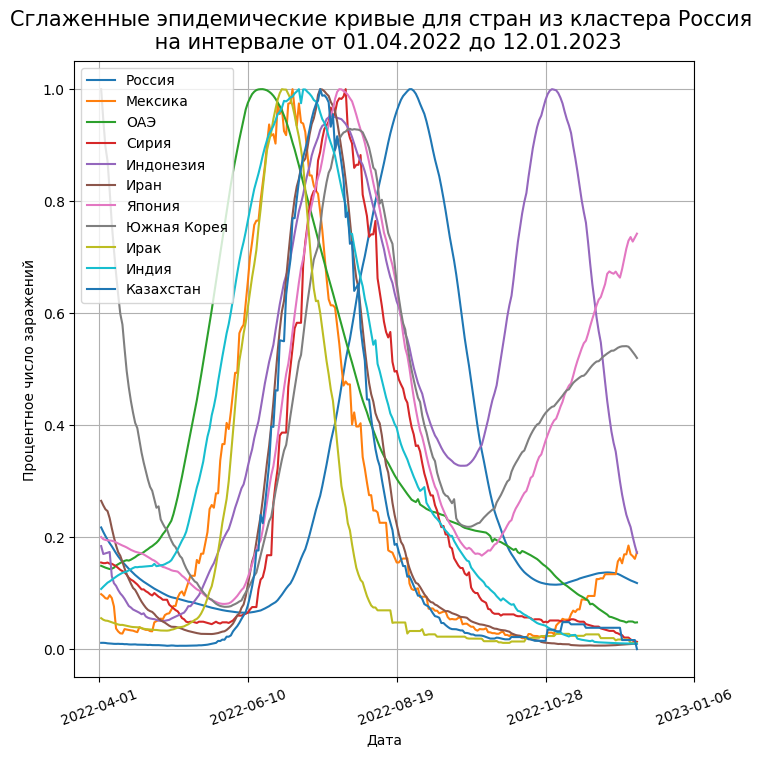

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.title('Сглаженные эпидемические кривые для стран из кластера Россия \n \
на интервале от 01.04.2022 до 12.01.2023', va='bottom', fontsize=15)
#plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.95)
for i in range(len(rus_claster_min)):
  y = data_new[data_new['Страна'] == rus_claster_min[i]]['Заражений за день']
  y = y.rolling(window=35).mean().iloc[34:].values
  plt.plot(np.arange(len(y))+1, y / max(y), label=rus_claster_min[i])
plt.xlabel('Дата')
plt.ylabel('Процентное число заражений')
l = list(data_new[data_new['Страна'] == rus_claster_min[i]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 70), l[::70], rotation=20)
plt.grid(True)
plt.legend()
plt.savefig('21.jpg')

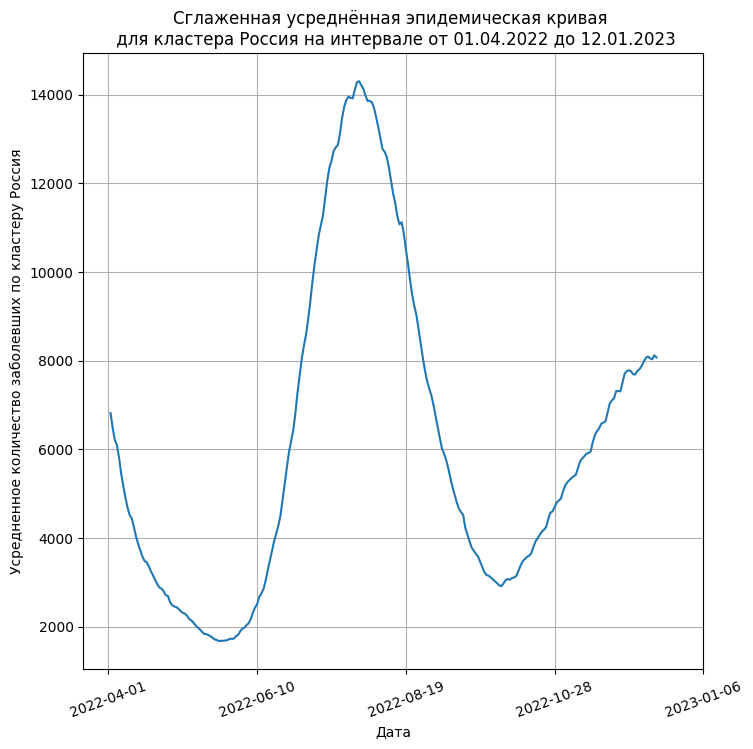

In [ ]:
plt.figure(figsize=(8, 8))
total_y = np.array(data_new[data_new['Страна'] == rus_claster_2[0]]['Заражений за день'])
for i in range(1, len(rus_claster_2)):
  total_y += np.array(data_new[data_new['Страна'] == rus_claster_2[i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(rus_claster_2)

plt.plot(np.arange(len(total_y))+1, total_y)
plt.title('Сглаженная усреднённая эпидемическая кривая \n для кластера Россия на интервале от 01.04.2022 до 12.01.2023')
plt.xlabel('Дата')
plt.ylabel('Усредненное количество заболевших по кластеру Россия')
l = list(data_new[data_new['Страна'] == rus_claster_2[0]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 70), l[::70], rotation=20)
plt.grid(True)
plt.savefig('3.jpg')
plt.show()

In [ ]:
np.array(country_stat)[labels_new == 1]

array(['Великобритания', 'Ирландия', 'Венгрия', 'Финляндия', 'Эстония',
       'Швейцария', 'Швеция', 'Кипр', 'Аргентина', 'Колумбия',
       'Мадагаскар', 'Никарагуа'], dtype='<U20')

In [ ]:
claster_2 = np.array(['Великобритания', 'Ирландия', 'Венгрия', 'Швейцария', 'Аргентина'])

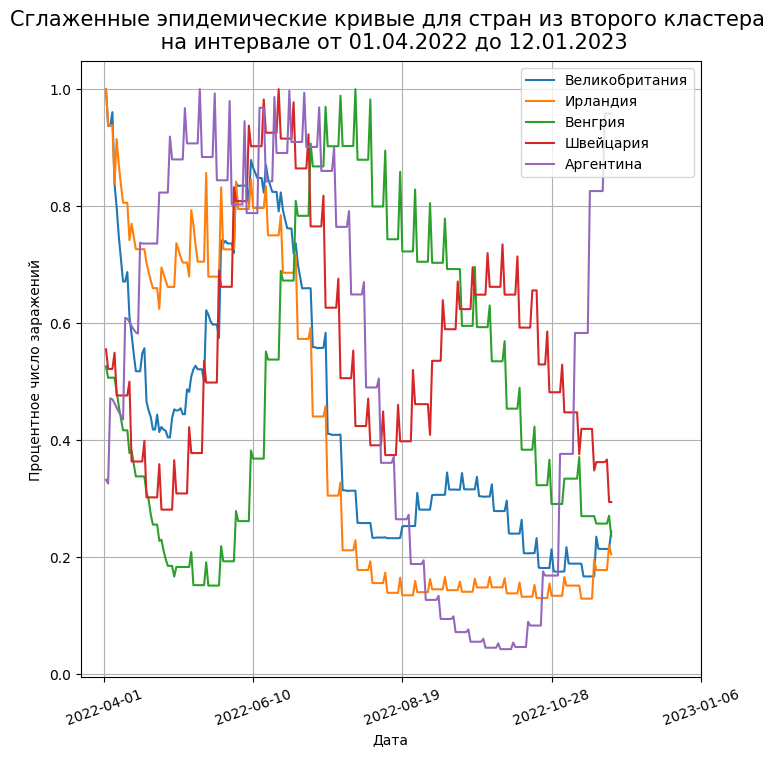

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.title('Сглаженные эпидемические кривые для стран из второго кластера \n \
на интервале от 01.04.2022 до 12.01.2023', va='bottom', fontsize=15)
#plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.95)
for i in range(len(claster_2)):
  y = data_new[data_new['Страна'] == claster_2[i]]['Заражений за день']
  y = y.rolling(window=50).mean().iloc[49:].values
  plt.plot(np.arange(len(y))+1, y / max(y), label=claster_2[i])
plt.xlabel('Дата')
plt.ylabel('Процентное число заражений')
l = list(data_new[data_new['Страна'] == claster_2[i]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 70), l[::70], rotation=20)
plt.grid(True)
plt.legend()
plt.savefig('22.jpg')

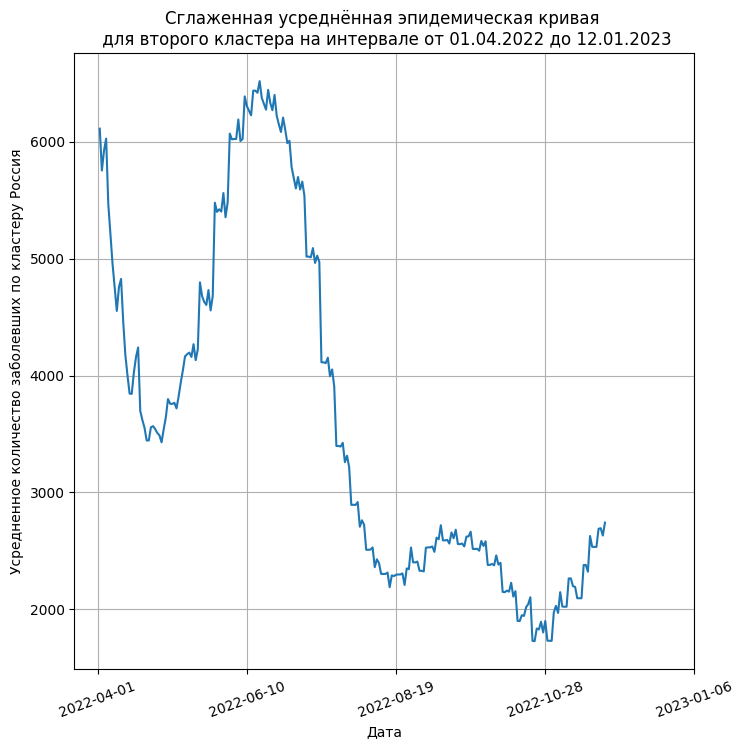

In [ ]:
plt.figure(figsize=(8, 8))
total_y = np.array(data_new[data_new['Страна'] == claster_2[0]]['Заражений за день'])
for i in range(1, len(claster_2)):
  total_y += np.array(data_new[data_new['Страна'] == claster_2[i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=50).mean().iloc[49:].values
total_y = total_y / len(claster_2)

plt.plot(np.arange(len(total_y))+1, total_y)
plt.title('Сглаженная усреднённая эпидемическая кривая \n для второго кластера на интервале от 01.04.2022 до 12.01.2023')
plt.xlabel('Дата')
plt.ylabel('Усредненное количество заболевших по кластеру Россия')
l = list(data_new[data_new['Страна'] == claster_2[0]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 70), l[::70], rotation=20)
plt.grid(True)
plt.savefig('4.jpg')
plt.show()

'Великобритания', 'Ирландия' Швеция Колумбия

In [ ]:
np.array(country_stat)[labels_new == 0]

array(['Беларусь', 'Вьетнам', 'Тунис', 'Ливия', 'Греция', 'Коста-Рика',
       'Оман', 'Турция'], dtype='<U20')

In [ ]:
np.array(country_stat)[labels_new == 5]

array(['Израиль', 'Кения', 'Марокко', 'Бангладеш', 'Саудовская Аравия',
       'Сингапур', 'Эфиопия'], dtype='<U20')

In [ ]:
claster_4 = np.array(['Израиль', 'Саудовская Аравия', 'Сингапур'])

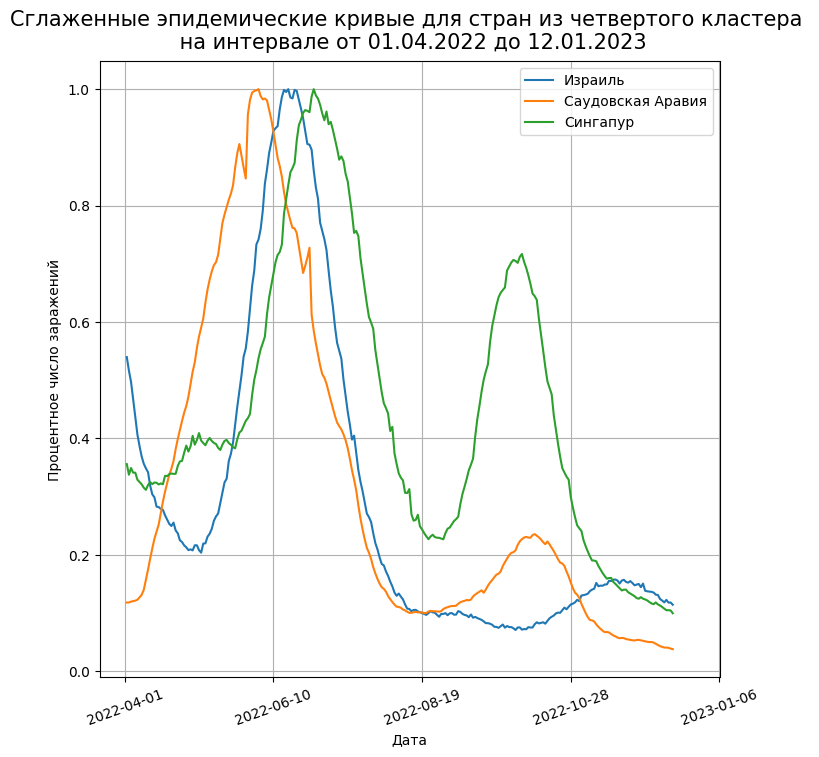

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.title('Сглаженные эпидемические кривые для стран из четвертого кластера \n \
на интервале от 01.04.2022 до 12.01.2023', va='bottom', fontsize=15)
#plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.95)
for i in range(len(claster_4)):
  y = data_new[data_new['Страна'] == claster_4[i]]['Заражений за день']
  y = y.rolling(window=30).mean().iloc[29:].values
  plt.plot(np.arange(len(y))+1, y / max(y), label=claster_4[i])
plt.xlabel('Дата')
plt.ylabel('Процентное число заражений')
l = list(data_new[data_new['Страна'] == claster_4[i]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 70), l[::70], rotation=20)
plt.grid(True)
plt.legend()
plt.savefig('23.jpg')

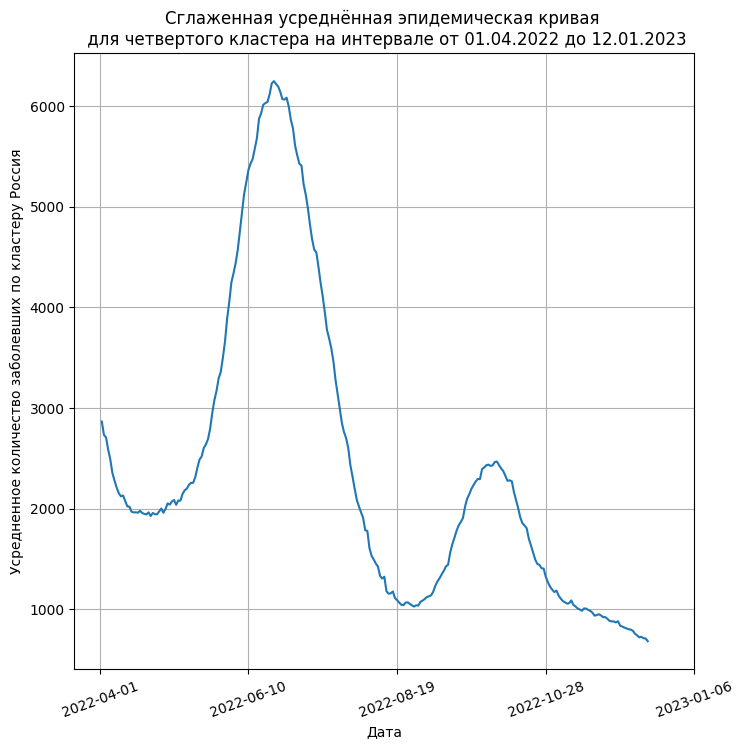

In [ ]:
plt.figure(figsize=(8, 8))
total_y = np.array(data_new[data_new['Страна'] == claster_4[0]]['Заражений за день'])
for i in range(1, len(claster_4)):
  total_y += np.array(data_new[data_new['Страна'] == claster_4[i]]['Заражений за день'])

total_y = pd.Series(total_y).rolling(window=30).mean().iloc[29:].values
total_y = total_y / len(claster_4)

plt.plot(np.arange(len(total_y))+1, total_y)
plt.title('Сглаженная усреднённая эпидемическая кривая \n для четвертого кластера на интервале от 01.04.2022 до 12.01.2023')
plt.xlabel('Дата')
plt.ylabel('Усредненное количество заболевших по кластеру Россия')
l = list(data_new[data_new['Страна'] == claster_4[0]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(l), 70), l[::70], rotation=20)
plt.grid(True)
plt.savefig('5.jpg')
plt.show()

In [ ]:
usa = data_new[data_new['Страна'] == 'США']

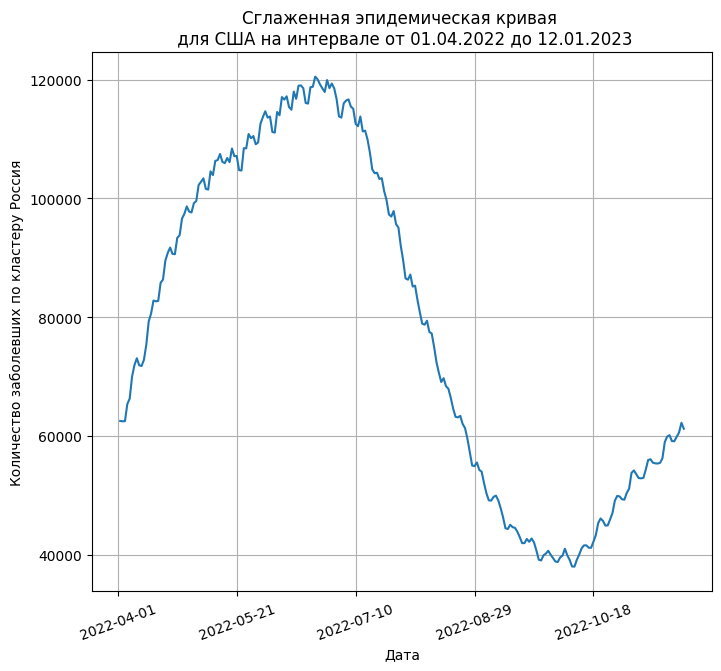

In [ ]:
y = usa['Заражений за день']
y = pd.Series(y).rolling(window=50).mean().iloc[49:].values
plt.figure(figsize=(8, 7))
plt.plot(np.arange(len(y))+1, y)
plt.title('Сглаженная эпидемическая кривая \n для США на интервале от 01.04.2022 до 12.01.2023')
plt.xlabel('Дата')
plt.ylabel('Количество заболевших по кластеру Россия')
l = list(data_new[data_new['Страна'] == claster_4[0]]['Дата'].dt.date)
plt.xticks(np.arange(0, len(y), 50), l[:len(y):50], rotation=20)
plt.grid(True)
plt.savefig('6.jpg')
plt.show()


In [ ]:
np.array(country_stat)[labels_new == 24]

array(['Норвегия', 'Куба', 'Малайзия', 'Таиланд', 'Лаос'], dtype='<U20')

In [ ]:
np.array(country_stat)[labels_new == 7]

array(['Польша', 'Литва', 'Хорватия', 'Латвия', 'Словения'], dtype='<U20')

In [ ]:
np.array(country_stat)[labels_new == 10]

array(['Украина', 'Мьянма'], dtype='<U20')

# Регионы

In [ ]:
from pandas.io.common import dataclasses
excel_reader = pd.ExcelFile("region.xlsx")
name = excel_reader.sheet_names
data = []
for i in name:
    d = pd.read_excel('region.xlsx', sheet_name=i)
    data.append(d)

In [ ]:
d_full = pd.concat(data)

In [ ]:
#d_full['date'] = pd.to_datetime(d_full['date'])

In [ ]:
d_full = d_full.sort_values(by='date')

In [ ]:
# for i in range(len(name)):
#     data[i]= data[i].sort_values(by='date')

In [ ]:
#name_reg = []
#for i in range(len(name)):
name_reg = d_full['Регион'].unique()

In [ ]:
stat_reg = {}
#for i in range(len(name)):
for j in range(len(name_reg)):
    d = d_full[d_full['Регион'] == name_reg[j]]
    stat_reg[name_reg[j]] = []
    stat_reg[name_reg[j]].append(d['Заражений'].isna().sum())
    stat_reg[name_reg[j]].append(len(d))

In [ ]:
stat_reg, len(stat_reg)

({'Красноярский край': [0, 1232],
  'Чувашская Республика': [0, 1232],
  'Сахалинская область': [4, 1232],
  'Санкт-Петербург': [2, 1232],
  'Карачаево-Черкесская Республика': [2, 1232],
  'Астраханская область': [0, 1232],
  'Тульская область': [17, 1232],
  'Ханты-Мансийский АО': [0, 1232],
  'Хабаровский край': [1, 1232],
  'Ставропольский край': [3, 1232],
  'Челябинская область': [1, 1232],
  'Республика Татарстан': [6, 1232],
  'Кировская область': [0, 1232],
  'Приморский край': [1, 1232],
  'Алтайский край': [2, 1232],
  'Республика Башкортостан': [4, 1232],
  'Оренбургская область': [67, 1232],
  'Ульяновская область': [4, 1232],
  'Краснодарский край': [1, 1232],
  'Республика Тыва': [10, 1232],
  'Липецкая область': [4, 1232],
  'Республика Северная Осетия': [3, 1232],
  'Еврейская АО': [1, 1232],
  'Ярославская область': [2, 1232],
  'Ненецкий автономный округ': [8, 1232],
  'Омская область': [11, 1232],
  'Амурская область': [4, 1232],
  'Воронежская область': [15, 1232],


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# count = 0
# plt.figure(figsize=(20,20))
# for i in range(len(name)):
#   for j in range(len(name_reg[i])):
#       count += 1
#       d = data[i][data[i]['Регион'] == name_reg[i][j]]
#       plt.subplot(17, 5, count)
#       plt.plot(np.arange(len(d)), d['Заражений'])

In [ ]:
print(*np.array(d_full[d_full['Регион'] == 'Чукотский АО']['Заражений']))

4.0 5.0 1.0 3.0 2.0 0.0 0.0 1.0 2.0 3.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 2.0 1.0 0.0 4.0 1.0 6.0 5.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 2.0 0.0 2.0 3.0 7.0 5.0 2.0 0.0 1.0 6.0 4.0 6.0 5.0 4.0 0.0 4.0 3.0 2.0 6.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 3.0 2.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 2.0 nan 0.0 0.0 0.0 1.0 2.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 2.0 3.0 0.0 2.0 0.0 0.0 2.0 2.0 3.0 1.0 1.0 0.0 1.0 2.0 4.0 1.0 1.0 0.0 2.0 0.0 2.0 4.0 2.0 0.0 0.0 0.0 1.0 1.0 2.0 6.0 0.0 1.0 3.0 0.0 6.0 0.0 2.0 2.0 0.0 4.0 3.0 4.0 5.0 8.0 0.0 0.0 6.0 1.0 nan 4.0 3.0 2.0 5.0 9.0 5.0 8.0 3.0 5.0 17.0 9.0 8.0 6.0 7.0 8.0 10.0 3.0 0.0 3.0 10.0 7.0 5.0 2.0 1.0 2.0 3.0 2.0 5.0 0.0 9.0 5.0 0.0 12.0 7.0 9.0 6.0 10.0 5.0 0.0 6.0 1.0 7.0 15.0 6.0 1.

In [ ]:
#for i in range(len(name)):
d_full_inter = d_full.copy()
for j in range(len(name_reg)):
    mask = d_full['Регион'] == name_reg[j]
    d_full_inter.loc[mask, 'Заражений'] = d_full[mask]['Заражений'].interpolate(method='linear', order=9)

In [ ]:
print(*np.array(d_full_inter[d_full_inter['Регион'] == 'Чукотский АО']['Заражений']))

4.0 5.0 1.0 3.0 2.0 0.0 0.0 1.0 2.0 3.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 2.0 1.0 0.0 4.0 1.0 6.0 5.0 9.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 2.0 0.0 2.0 3.0 7.0 5.0 2.0 0.0 1.0 6.0 4.0 6.0 5.0 4.0 0.0 4.0 3.0 2.0 6.0 9.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 2.0 0.0 0.0 2.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 3.0 2.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 2.0 3.0 0.0 2.0 0.0 0.0 2.0 2.0 3.0 1.0 1.0 0.0 1.0 2.0 4.0 1.0 1.0 0.0 2.0 0.0 2.0 4.0 2.0 0.0 0.0 0.0 1.0 1.0 2.0 6.0 0.0 1.0 3.0 0.0 6.0 0.0 2.0 2.0 0.0 4.0 3.0 4.0 5.0 8.0 0.0 0.0 6.0 1.0 2.5 4.0 3.0 2.0 5.0 9.0 5.0 8.0 3.0 5.0 17.0 9.0 8.0 6.0 7.0 8.0 10.0 3.0 0.0 3.0 10.0 7.0 5.0 2.0 1.0 2.0 3.0 2.0 5.0 0.0 9.0 5.0 0.0 12.0 7.0 9.0 6.0 10.0 5.0 0.0 6.0 1.0 7.0 15.0 6.0 1.

In [ ]:
d_full_inter['Заражений'].isna().sum()

433

In [ ]:
d_full_inter = d_full_inter[d_full_inter['Регион'] != 'г. Севастополь']

In [ ]:
d_full_inter['Заражений'].isna().sum()

0

In [ ]:
d_full_inter.loc[:, 'Заражений'] = round(d_full_inter['Заражений'])

In [ ]:
d_full_inter = d_full_inter.sort_values(by='Регион')

In [ ]:
d = []
name_reg_all = name_reg
name_reg_all = name_reg_all[name_reg_all != 'г. Севастополь']
name_reg_all = np.sort(name_reg_all)
for j in range(len(name_reg_all)):
   buf = d_full_inter[d_full_inter['Регион'] == name_reg_all[j]]
   buf = buf.sort_values(by='date', kind='mergesort')
   d.append(buf)
d_full_inter = pd.concat(d)

In [ ]:
d_full_inter

,Регион,date,Заражений,Прирост,'%
10722,Алтайский край,2020-04-22 00:00:00+03:00,8.0,NaN,NaN
10735,Алтайский край,2020-04-23 00:00:00+03:00,8.0,0.0,NaN
7152,Алтайский край,2020-04-24 00:00:00+03:00,63.0,55.0,NaN
6876,Алтайский край,2020-04-25 00:00:00+03:00,68.0,5.0,NaN
9339,Алтайский край,2020-04-26 00:00:00+03:00,27.0,-41.0,NaN
...,...,...,...,...,...
68,Ярославская область,2023-09-01 00:00:00+03:00,6.0,NaN,NaN
20939,Ярославская область,2023-09-02 00:00:00+03:00,5.0,NaN,NaN
21222,Ярославская область,2023-09-03 00:00:00+03:00,4.0,-1.0,NaN
20688,Ярославская область,2023-09-04 00:00:00+03:00,6.0,2.0,NaN


In [ ]:
d_full_inter.to_excel('region_new.xlsx')

In [ ]:
x = d_full_inter['Регион'].unique()
x.join(' ')

AttributeError: ignored

In [ ]:
file = open("name_reg.txt", "w")
file.write(x)
file.close()

In [ ]:
import numpy as np
x = np.array([1, 2, 3])
y = np.array([3, 4, 5, 6])
(x - y[:, np.newaxis])
y = np.array([[3, 4, 5], [2, 3, 4]])
c = np.array([1, 2])
((x / y) / c[:, np.newaxis]).sum(axis=1).shape

(2,)

In [ ]:
y = np.array([3, 4, 5, 6])[np.newaxis]
y.shape

(1, 4)

In [ ]:
from scipy.stats import binom

x, binom.pmf(np.array([0, -1])[:, np.newaxis], x, 0.5)

(array([1, 2, 3]),
 array([[0.5  , 0.25 , 0.125],
        [0.   , 0.   , 0.   ]]))

In [ ]:
print(*np.array(d_full_inter[d_full_inter['Регион'] == 'Чукотский АО']['Заражений']))

NameError: ignored

In [ ]:
x = np.array([[1, 2, 3], [1, 2, 3]])
y = np.array([[1, 2, 3, 4], [1, 2, 3, 4]])
x, y, x[:, :, np.newaxis] @ y[:, np.newaxis, :]

(array([[1, 2, 3],
        [1, 2, 3]]),
 array([[1, 2, 3, 4],
        [1, 2, 3, 4]]),
 array([[[ 1,  2,  3,  4],
         [ 2,  4,  6,  8],
         [ 3,  6,  9, 12]],
 
        [[ 1,  2,  3,  4],
         [ 2,  4,  6,  8],
         [ 3,  6,  9, 12]]]))

In [ ]:
x = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
x, x + x.T

(array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]]),
 array([[ 2,  7, 12, 17],
        [ 7, 12, 17, 22],
        [12, 17, 22, 27],
        [17, 22, 27, 32]]))

In [ ]:
np.roll(x, [0, 1, 2, 3], axis=[1, 1, 1, 1])

array([[ 3,  4,  1,  2],
       [ 7,  8,  5,  6],
       [11, 12,  9, 10],
       [15, 16, 13, 14]])

In [ ]:
np.ravel(x), np.ravel(x, order='F'), np.ravel(x) + np.ravel(x, order='F')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([ 1,  5,  9, 13,  2,  6, 10, 14,  3,  7, 11, 15,  4,  8, 12, 16]),
 array([ 2,  7, 12, 17,  7, 12, 17, 22, 12, 17, 22, 27, 17, 22, 27, 32]))

In [ ]:
y = (x[:, :, np.newaxis, np.newaxis] + x[np.newaxis, np.newaxis, :, :])
np.trace(y, axis1=0, axis2=1)

array([[38, 42, 46, 50],
       [54, 58, 62, 66],
       [70, 74, 78, 82],
       [86, 90, 94, 98]])

In [ ]:
y

array([[[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13],
         [14, 15, 16, 17]],

        [[ 3,  4,  5,  6],
         [ 7,  8,  9, 10],
         [11, 12, 13, 14],
         [15, 16, 17, 18]],

        [[ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]],

        [[ 5,  6,  7,  8],
         [ 9, 10, 11, 12],
         [13, 14, 15, 16],
         [17, 18, 19, 20]]],


       [[[ 6,  7,  8,  9],
         [10, 11, 12, 13],
         [14, 15, 16, 17],
         [18, 19, 20, 21]],

        [[ 7,  8,  9, 10],
         [11, 12, 13, 14],
         [15, 16, 17, 18],
         [19, 20, 21, 22]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[ 9, 10, 11, 12],
         [13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]],


       [[[10, 11, 12, 13],
         [14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]],

      

In [ ]:
z = (x + x.T)[:2]
z

array([[ 2,  7, 12, 17],
       [ 7, 12, 17, 22]])

In [ ]:
 buf = x[:, np.newaxis, :, np.newaxis] * y[np.newaxis, :, np.newaxis, :]
buf.shape

(2, 2, 3, 4)

In [ ]:
mask = (d_full_inter['date'].dt.year == 2021) + (d_full_inter['date'].dt.year == 2020) * (d_full_inter['date'].dt.month >= 4) # + ((d_full_inter['date'].dt.year == 2022) * (d_full_inter['date'].dt.month <= 4))
d_full_old = d_full_inter[mask]
mask = ((d_full_inter['date'].dt.year == 2022) * (d_full_inter['date'].dt.month >= 4)) + (d_full_inter['date'].dt.year == 2023)
d_full_new = d_full_inter[mask]

In [ ]:
d_full_old

,Регион,date,Заражений,Прирост,'%
9658,Красноярский край,2020-04-22 00:00:00+03:00,22.0,NaN,NaN
14549,Чувашская Республика,2020-04-22 00:00:00+03:00,27.0,NaN,NaN
13041,Сахалинская область,2020-04-22 00:00:00+03:00,0.0,NaN,NaN
2246,Санкт-Петербург,2020-04-22 00:00:00+03:00,294.0,NaN,NaN
3837,Карачаево-Черкесская Республика,2020-04-22 00:00:00+03:00,47.0,NaN,NaN
...,...,...,...,...,...
10311,Республика Тыва,2021-12-31 00:00:00+03:00,13.0,1.0,NaN
8629,Орловская область,2021-12-31 00:00:00+03:00,137.0,-8.0,NaN
10432,Удмуртская Республика,2021-12-31 00:00:00+03:00,68.0,2.0,3.030303
9544,Республика Алтай,2021-12-31 00:00:00+03:00,24.0,-2.0,NaN


In [ ]:
name_reg_all = name_reg
name_reg_all = name_reg_all[name_reg_all != 'г. Севастополь']

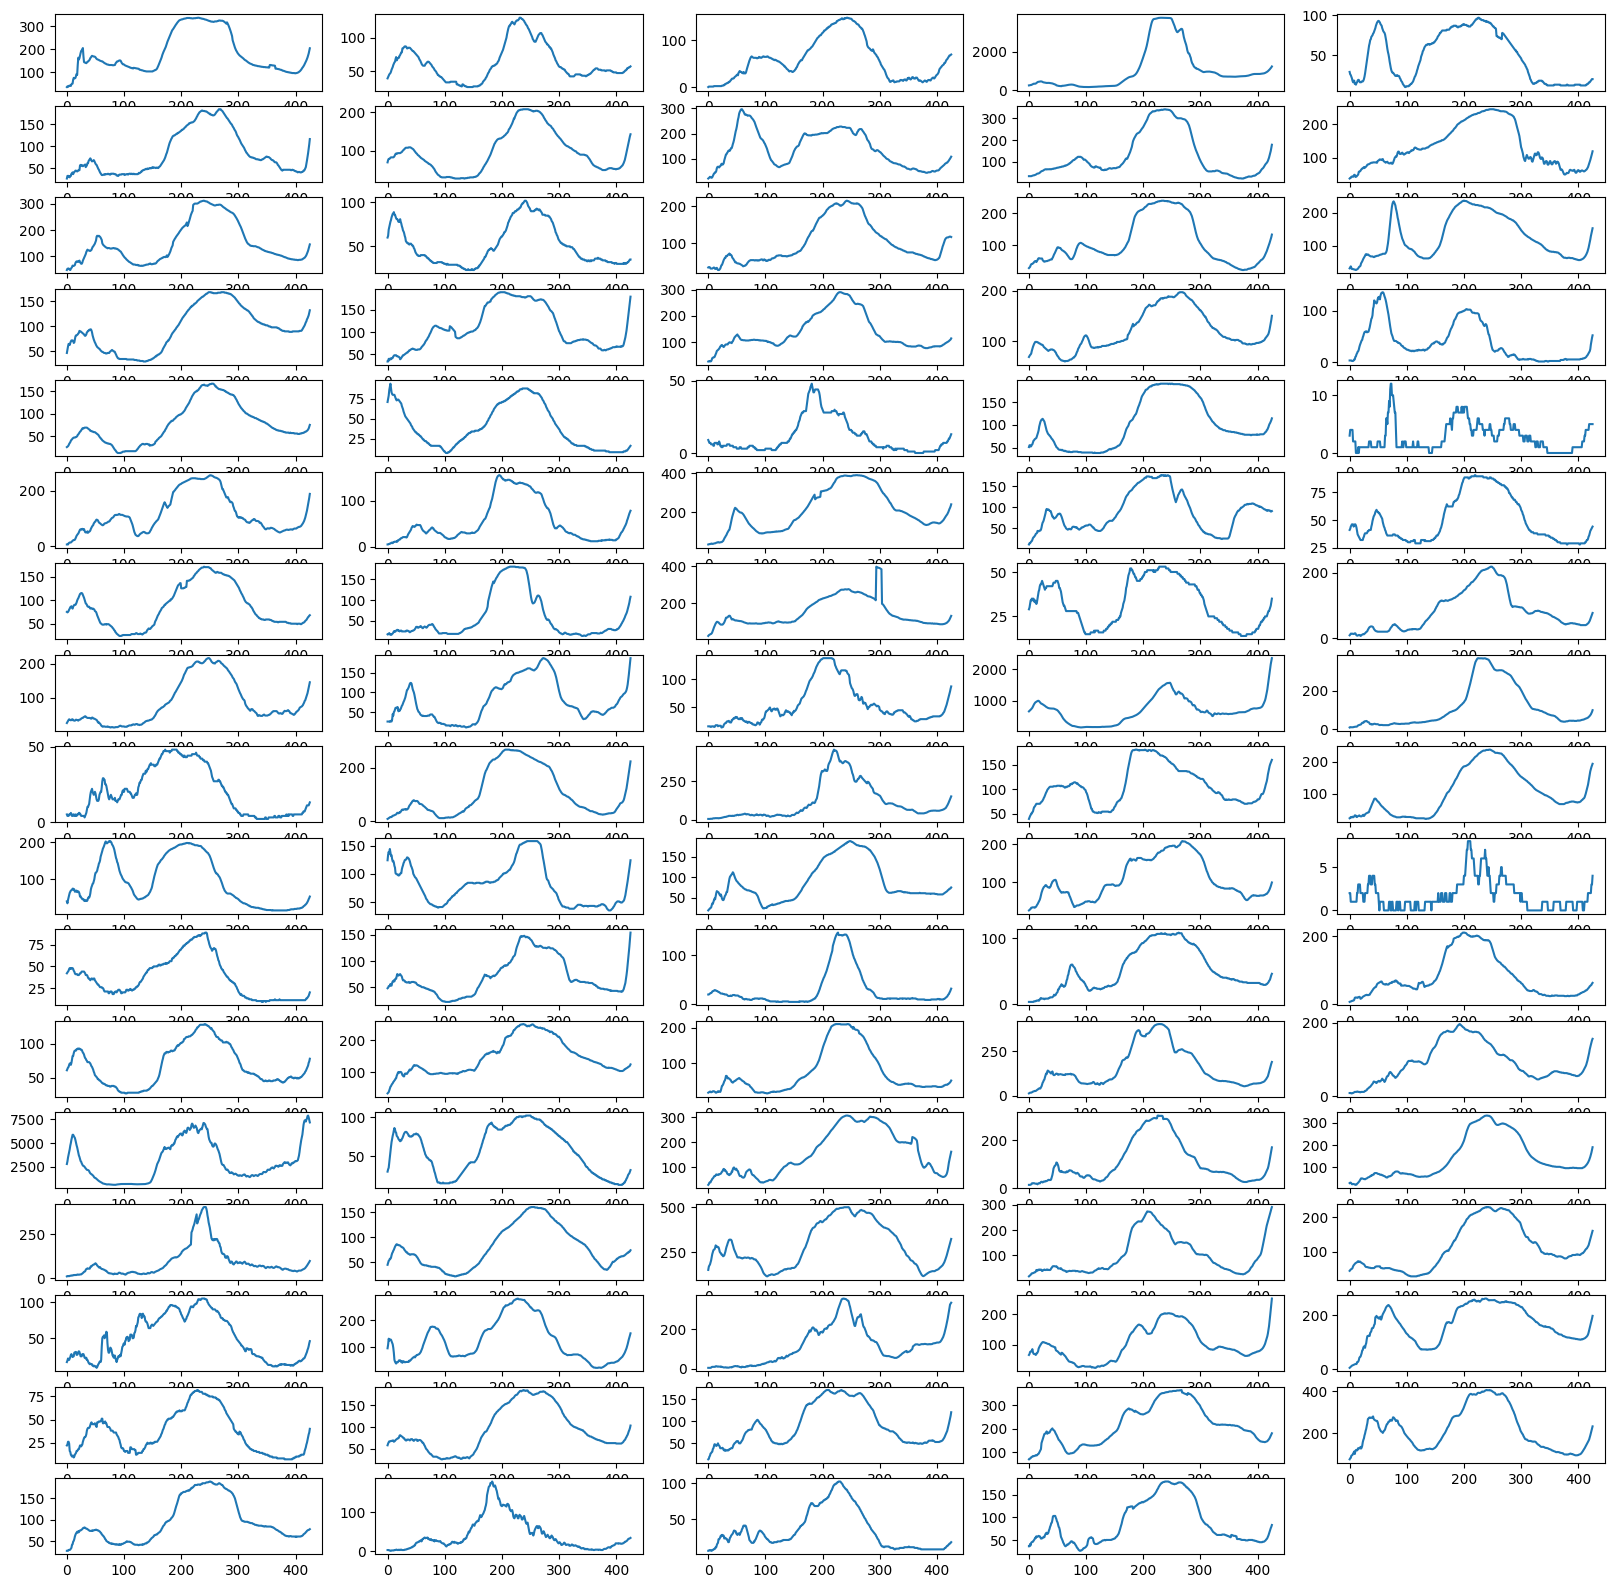

In [ ]:
count = 0
plt.figure(figsize=(20,20))
for j in range(len(name_reg_all)):
    count += 1
    d = d_full_old[d_full_old['Регион'] == name_reg_all[j]]
    y = d['Заражений']
    y = np.round(y.rolling(window=10).mean().iloc[9:].values)
    plt.subplot(17, 5, count)
    plt.plot(np.arange(len(y)), y)

In [ ]:
n = len(d_full_old[d_full_old['Регион'] == name_reg_all[0]]['Заражений'])
corr_reg = np.eye(len(name_reg_all))
for i in range(len(name_reg_all)):
  for j in range(i+1, len(name_reg_all)):
    si = d_full_old[d_full_old['Регион'] == name_reg_all[i]]['Заражений']#.rolling(window=5).mean().iloc[4:].values)
    sj = d_full_old[d_full_old['Регион'] == name_reg_all[j]]['Заражений']#.rolling(window=5).mean().iloc[4:].values)
    p = []
    n = len(si)
    for l in range(21):
        if np.std(si[:n-l]) != 0 and np.std(sj[l:]) != 0:
          p.append(np.corrcoef(si[:n-l], sj[l:])[0,1])
        if np.std(sj[:n-l]) != 0 and np.std(si[l:]) != 0:
          p.append(np.corrcoef(si[l:], sj[:n-l])[0,1])
    if p == []:
      corr_reg[i, j] = 0
      corr_reg[j, i] = 0
    else:
      corr_reg[i, j] = np.max(p)
      corr_reg[j, i] = np.max(p)

In [ ]:
(corr_reg <= 0).sum()

0

In [ ]:
corr_old = pd.DataFrame(corr_reg, columns=name_reg_all)
corr_old.insert(loc=0, column='Регионы', value=name_reg_all)
corr_old.to_excel('corr_old.xlsx')

In [ ]:
np.savetxt("corr_old.csv", corr_reg, delimiter=",", fmt="%.8f")

In [ ]:
corr_reg[0]

array([1.        , 0.78679412, 0.85391424, 0.81147219, 0.72603798,
       0.90845704, 0.82592909, 0.62775552, 0.91806215, 0.86908132,
       0.90534855, 0.75983101, 0.89664691, 0.92104004, 0.8382253 ,
       0.73051861, 0.86976593, 0.9161277 , 0.82119198, 0.46022837,
       0.83014995, 0.73837718, 0.83003523, 0.84520642, 0.38612522,
       0.91423713, 0.92136681, 0.8751323 , 0.81435833, 0.89288497,
       0.82019634, 0.8794412 , 0.59907683, 0.81750465, 0.83488581,
       0.8604184 , 0.80029119, 0.82673114, 0.6100678 , 0.88110969,
       0.75531153, 0.92419199, 0.86431933, 0.87721513, 0.85158011,
       0.70767772, 0.65323709, 0.89942422, 0.87267601, 0.53332243,
       0.8384231 , 0.77384383, 0.72494529, 0.88252137, 0.88483783,
       0.82635772, 0.8867039 , 0.91201906, 0.9062758 , 0.77313843,
       0.79393797, 0.75716717, 0.78889038, 0.90093328, 0.89460565,
       0.74239294, 0.80920653, 0.83923006, 0.87715768, 0.8371705 ,
       0.71084017, 0.83478716, 0.77018717, 0.83413474, 0.83729

In [ ]:
np.isnan(corr_reg).sum()

0

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=None, metric='precomputed', linkage='complete', distance_threshold=0.5)
labels_new = agg.fit_predict(1-corr_reg)

In [ ]:
labels_new

array([1, 1, 0, 3, 0, 1, 3, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 0, 1, 3, 1,
       3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3,
       3, 3, 0, 3, 2, 0, 1, 1, 1, 0, 3, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
np.array(name_reg_all)[labels_new == 0]

array(['Сахалинская область', 'Карачаево-Черкесская Республика',
       'Ханты-Мансийский АО', 'Магаданская область', 'Ямало-Ненецкий АО',
       'Томская область', 'Республика Бурятия', 'Мурманская область',
       'Камчатский край', 'Республика Алтай', 'Республика Адыгея'],
      dtype=object)

In [ ]:
np.array(name_reg_all)[labels_new == 1]

array(['Красноярский край', 'Чувашская Республика',
       'Астраханская область', 'Хабаровский край', 'Ставропольский край',
       'Челябинская область', 'Республика Татарстан', 'Приморский край',
       'Алтайский край', 'Республика Башкортостан',
       'Оренбургская область', 'Ульяновская область',
       'Краснодарский край', 'Липецкая область',
       'Республика Северная Осетия', 'Еврейская АО',
       'Ненецкий автономный округ', 'Омская область', 'Амурская область',
       'Воронежская область', 'Республика Саха ( Якутия )',
       'Республика Мордовия', 'Республика Хакасия',
       'Волгоградская область', 'Республика Марий Эл',
       'Удмуртская Республика', 'Смоленская область',
       'Костромская область', 'Забайкальский край',
       'Новосибирская область', 'Республика Дагестан',
       'Пензенская область', 'Чукотский АО', 'Республика Ингушетия',
       'Владимирская область', 'Чеченская Республика',
       'Курганская область', 'Рязанская область', 'Саратовская обла

In [ ]:
np.array(name_reg_all)[labels_new == 2]

array(['Республика Тыва', 'Республика Калмыкия'], dtype=object)

In [ ]:
np.array(name_reg_all)[labels_new == 3]

array(['Санкт-Петербург', 'Тульская область', 'Кировская область',
       'Ярославская область', 'Калужская область',
       'Калининградская область', 'Московская область',
       'Вологодская область', 'Республика Карелия', 'Тверская область',
       'Ивановская область', 'Новгородская область',
       'Архангельская область', 'Москва',
       'Кабардино-Балкарская Республика', 'Псковская область',
       'Тамбовская область', 'Нижегородская область',
       'Ленинградская область', 'Курская область'], dtype=object)

In [ ]:
np.array(name_reg_all)[labels_new == 4]

array([], dtype=object)

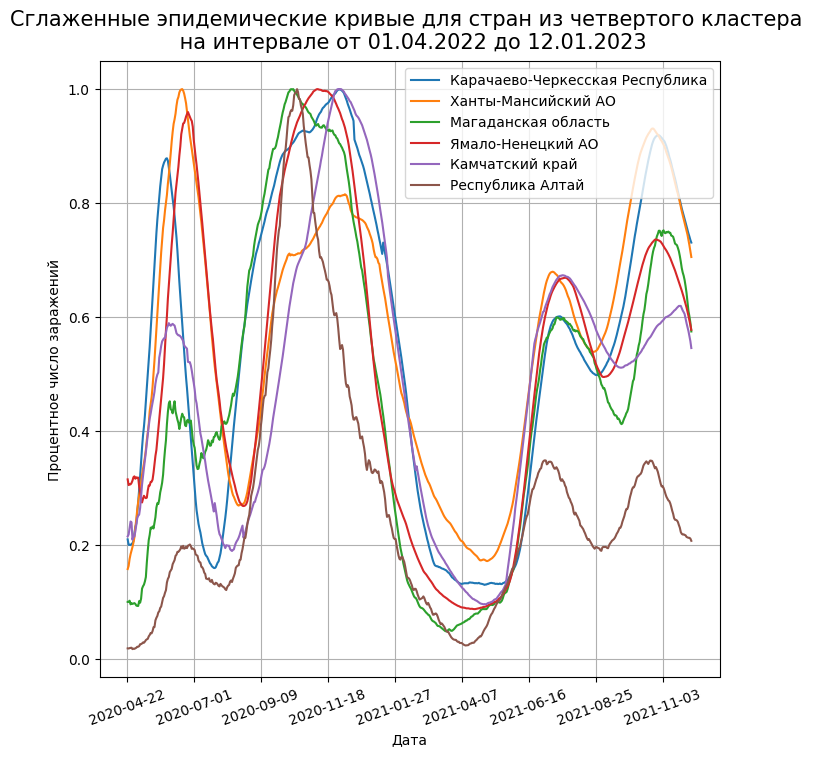

In [ ]:
cls = np.array(name_reg_all)[labels_new == 0]
fig = plt.figure(figsize=(8, 8))
plt.title('Сглаженные эпидемические кривые для стран из четвертого кластера \n \
на интервале от 01.04.2022 до 12.01.2023', va='bottom', fontsize=15)
#plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.95)
for i in range(len(cls)):
  y = d_full_old[d_full_old['Регион'] == cls[i]]['Заражений']
  y = y.rolling(window=30).mean().iloc[29:].values
  plt.plot(np.arange(len(y))+1, y / max(y), label=cls[i])
plt.xlabel('Дата')
plt.ylabel('Процентное число заражений')
l = list(d_full_old[d_full_old['Регион'] == cls[i]]['date'].dt.date)
plt.xticks(np.arange(0, len(l), 70), l[::70], rotation=20)
plt.grid(True)
plt.legend()
plt.savefig('2333.jpg')

In [ ]:
np.array(name_reg_all)[labels_new == 2]

array(['Орловская область'], dtype=object)

In [ ]:
n = len(d_full_new[d_full_new['Регион'] == name_reg_all[0]]['Заражений'])
corr_reg_new = np.eye(len(name_reg_all))
for i in range(len(name_reg_all)):
  for j in range(i+1, len(name_reg_all)):
    si = d_full_new[d_full_new['Регион'] == name_reg_all[i]]['Заражений']
    sj = d_full_new[d_full_new['Регион'] == name_reg_all[j]]['Заражений']
    p = []
    for l in range(21):
        if np.std(si[:n-l]) != 0 and np.std(sj[l:]) != 0:
          p.append(np.corrcoef(si[:n-l], sj[l:])[0,1])
        if np.std(sj[:n-l]) != 0 and np.std(si[l:]) != 0:
          p.append(np.corrcoef(si[l:], sj[:n-l])[0,1])
    if p == []:
      corr_reg_new[i, j] = 0
      corr_reg_new[j, i] = 0
    else:
      corr_reg_new[i, j] = np.max(p)
      corr_reg_new[j, i] = np.max(p)

In [ ]:
(corr_reg_new <= 0).sum()

0

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=None, metric='precomputed', linkage='average', distance_threshold=0.5)
labels_new = agg.fit_predict(1-corr_reg_new)

In [ ]:
labels_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
d_full[d_full['Регион'] == 'Забайкальский край']

,Регион,date,Заражений,Прирост,'%
11781,Забайкальский край,2020-04-22 00:00:00+03:00,3.0,NaN,NaN
10234,Забайкальский край,2020-04-23 00:00:00+03:00,9.0,6.0,200.000000
10057,Забайкальский край,2020-04-24 00:00:00+03:00,10.0,1.0,11.111111
10669,Забайкальский край,2020-04-25 00:00:00+03:00,7.0,-3.0,-30.000000
10868,Забайкальский край,2020-04-26 00:00:00+03:00,6.0,-1.0,-14.285714
...,...,...,...,...,...
8934,Забайкальский край,2023-09-01 00:00:00+03:00,18.0,1.0,5.882353
9723,Забайкальский край,2023-09-02 00:00:00+03:00,12.0,-6.0,-33.333333
11832,Забайкальский край,2023-09-03 00:00:00+03:00,3.0,-9.0,-75.000000
12288,Забайкальский край,2023-09-04 00:00:00+03:00,2.0,-1.0,-33.333333


In [ ]:
data_my = pd.read_excel('region_20_21_my.xlsx')
data_my

,Дата,Регион,Заражений за день
0,2021-12-31 03:00:00,Амурская обл.,222
1,2021-12-31 03:00:00,Ульяновская обл.,176
2,2021-12-31 03:00:00,Хакасия,85
3,2021-12-31 03:00:00,Саха (Якутия),100
4,2021-12-31 03:00:00,Омская обл.,323
...,...,...,...
56078,2020-03-12 03:00:00,Магаданская обл.,0
56079,2020-03-12 03:00:00,Камчатский край,0
56080,2020-03-12 03:00:00,Санкт-Петербург,1
56081,2020-03-12 03:00:00,Еврейская АО,0


In [ ]:
mask = (data_my['Дата'].dt.month >= 4) * (data_my['Дата'].dt.year == 2020) + (data_my['Дата'].dt.year == 2021)
data_my = data_my[mask]

In [ ]:
data_my = data_my.sort_values(by='Дата')
name_reg_my = data_my['Регион'].unique()
stat_reg_my = {}
#for i in range(len(name)):
for j in range(len(name_reg_my)):
    d = data_my[data_my['Регион'] == name_reg_my[j]]
    stat_reg_my[name_reg_my[j]] = []
    stat_reg_my[name_reg_my[j]].append(d['Заражений за день'].isna().sum())
    stat_reg_my[name_reg_my[j]].append(len(d))

In [ ]:
data_my

,Дата,Регион,Заражений за день
54399,2020-04-01 03:00:00,Новосибирская обл.,1
54397,2020-04-01 03:00:00,Тульская обл.,5
54396,2020-04-01 03:00:00,Марий Эл,0
54395,2020-04-01 03:00:00,Тамбовская обл.,3
54394,2020-04-01 03:00:00,Карачаево-Черкессия,0
...,...,...,...
3,2021-12-31 03:00:00,Саха (Якутия),100
2,2021-12-31 03:00:00,Хакасия,85
1,2021-12-31 03:00:00,Ульяновская обл.,176
8,2021-12-31 03:00:00,Астраханская обл.,177


In [ ]:
stat_reg_my

{'Новосибирская обл.': [0, 640],
 'Тульская обл.': [0, 640],
 'Марий Эл': [0, 640],
 'Тамбовская обл.': [0, 640],
 'Карачаево-Черкессия': [0, 640],
 'Краснодарский край': [0, 640],
 'Рязанская обл.': [0, 640],
 'Дагестан': [0, 640],
 'Бурятия': [0, 640],
 'Калмыкия': [0, 640],
 'Курганская обл.': [0, 640],
 'Воронежская обл.': [0, 640],
 'Саратовская обл.': [0, 640],
 'Хабаровский край': [0, 640],
 'Ставропольский край': [0, 640],
 'Пермский край': [0, 640],
 'Кемеровская обл.': [0, 640],
 'Архангельская обл.': [0, 640],
 'Крым': [0, 640],
 'Брянская обл.': [0, 640],
 'Коми': [0, 640],
 'Тюменская обл.': [0, 640],
 'Курская обл.': [0, 640],
 'Ярославская обл.': [0, 640],
 'Чукотский АО': [0, 640],
 'Москва': [0, 640],
 'Оренбургская обл.': [0, 640],
 'Мордовия': [0, 640],
 'Удмуртия': [0, 640],
 'Самарская обл.': [0, 640],
 'Костромская обл.': [0, 640],
 'Еврейская АО': [0, 640],
 'Татарстан': [0, 640],
 'Иркутская обл.': [0, 640],
 'Ульяновская обл.': [0, 640],
 'Липецкая обл.': [0, 6

In [ ]:
len(name_reg_my)

85

In [ ]:
n = len(data_my[data_my['Регион'] == name_reg_my[0]]['Заражений за день'])
n

640

In [ ]:
n = len(data_my[data_my['Регион'] == name_reg_my[0]]['Заражений за день'])
corr_reg_my = np.eye(len(name_reg_my))
for i in range(len(name_reg_my)):
  for j in range(i+1, len(name_reg_my)):
    si = data_my[data_my['Регион'] == name_reg_my[i]]['Заражений за день']
    sj = data_my[data_my['Регион'] == name_reg_my[j]]['Заражений за день']
    p = []
    for l in range(21):
        if np.std(si[:n-l]) != 0 and np.std(sj[l:]) != 0:
          p.append(np.corrcoef(si[:n-l], sj[l:])[0,1])
        if np.std(sj[:n-l]) != 0 and np.std(si[l:]) != 0:
          p.append(np.corrcoef(si[l:], sj[:n-l])[1,0])

    if p == []:
      corr_reg_my[i, j] = 0
      corr_reg_my[j, i] = 0
    else:
      corr_reg_my[i, j] = np.max(p)
      corr_reg_my[j, i] = np.max(p)

In [ ]:
(corr_reg_my <= 0).sum(), np.isnan(corr_reg_my).sum()

(0, 0)

In [ ]:
(corr_reg_my <= 0.5).sum(), 85*85

(578, 7225)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=None, metric='precomputed', linkage='average', distance_threshold=0.5)
labels_my = agg.fit_predict(1-corr_reg_my)

In [ ]:
labels_my

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.array(name_reg_my)[labels_my == 0]

array(['Карачаево-Черкессия', 'Ямало-Ненецкий АО', 'Алтай', 'ХМАО – Югра',
       'Магаданская обл.'], dtype=object)

In [ ]:
data_my['Дата'].dt.isocalendar().week

54344    14
54358    14
54399    14
54398    14
54397    14
         ..
3        52
2        52
1        52
8        52
0        52
Name: week, Length: 54400, dtype: UInt32

In [ ]:
d_my_20 = data_my[data_my['Дата'].dt.year == 2020]
d_my_21 = data_my[data_my['Дата'].dt.year == 2021]

In [ ]:
d_my_20.insert(loc=0, column='неделя', value=d_my_20['Дата'].dt.isocalendar().week)

In [ ]:
d_my_21.insert(loc=0, column='неделя', value=d_my_21['Дата'].dt.isocalendar().week)

In [ ]:
df_20 = []
for i in range(len(name_reg_my)):
  d = d_my_20[d_my_20['Регион'] == name_reg_my[i]]
  week = d['неделя'].unique()
  stat = []
  for j in week:
      stat.append(d[d['неделя'] == j]['Заражений за день'].mean())
  buf = pd.DataFrame({'Регион': [name_reg_my[i]]  * len(stat), 'Заражений за неделю': stat})
  df_20.append(buf)
df_20 = pd.concat(df_20)

In [ ]:
df_21 = []
for i in range(len(name_reg_my)):
  d = d_my_21[d_my_21['Регион'] == name_reg_my[i]]
  week = d['неделя'].unique()
  stat = []
  for j in week:
      stat.append(d[d['неделя'] == j]['Заражений за день'].mean())
  buf = pd.DataFrame({'Регион': [name_reg_my[i]]  * len(stat), 'Заражений за неделю': stat})
  df_21.append(buf)
df_21 = pd.concat(df_21)

In [ ]:
df = pd.concat([df_20, df_21])

In [ ]:
n = len(df[df['Регион'] == name_reg_my[0]]['Заражений за неделю'])
corr_reg_my_2 = np.eye(len(name_reg_my))
for i in range(len(name_reg_my)):
  for j in range(i+1, len(name_reg_my)):
    si = df[df['Регион'] == name_reg_my[i]]['Заражений за неделю']
    sj = df[df['Регион'] == name_reg_my[j]]['Заражений за неделю']
    p = []
    for l in range(2):
        if np.std(si[:n-l]) != 0 and np.std(sj[l:]) != 0:
          p.append(np.corrcoef(si[:n-l], sj[l:])[0,1])
        if np.std(sj[:n-l]) != 0 and np.std(si[l:]) != 0:
          p.append(np.corrcoef(si[l:], sj[:n-l])[0,1])
    if p == []:
      corr_reg_my_2[i, j] = 0
      corr_reg_my_2[j, i] = 0
    else:
      corr_reg_my_2[i, j] = np.max(p)
      corr_reg_my_2[j, i] = np.max(p)

In [ ]:
(corr_reg_my_2 <= 0).sum(), np.isnan(corr_reg_my_2).sum()

(0, 0)

In [ ]:
corr_reg_my_2

array([[1.        , 0.93242631, 0.95325482, ..., 0.8693159 , 0.91708525,
        0.89051422],
       [0.93242631, 1.        , 0.92471661, ..., 0.9461295 , 0.88318437,
        0.81401858],
       [0.95325482, 0.92471661, 1.        , ..., 0.83582117, 0.86381867,
        0.79488709],
       ...,
       [0.8693159 , 0.9461295 , 0.83582117, ..., 1.        , 0.82924464,
        0.84448678],
       [0.91708525, 0.88318437, 0.86381867, ..., 0.82924464, 1.        ,
        0.84223898],
       [0.89051422, 0.81401858, 0.79488709, ..., 0.84448678, 0.84223898,
        1.        ]])

In [ ]:
corr_reg_my_2.shape, n

((85, 85), 93)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=None, metric='precomputed', linkage='average', distance_threshold=0.5)
labels_new = agg.fit_predict(1-corr_reg_my_2)

In [ ]:
labels_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])